In [2]:
import pandas as pd
import glob
import os
import re

# Get all CSV files in the Data folder
csv_files = glob.glob('Data/*.csv')

# Map base file types to ids
file_types = ['idle', 'long', 'drive', 'live', 'ufpe']
file_map = {ftype: i+1 for i, ftype in enumerate(file_types)}

dfs = []
for trip_num, trip_fname in enumerate(csv_files):
    df = pd.read_csv(trip_fname)
    df.columns = [col.replace(" ()", "") for col in df.columns]
    cols = df.columns
    df = df.iloc[:, :-1]
    df = df.reset_index()
    df.columns = cols

    base = re.match(r'(idle|long|drive|live|ufpe)', os.path.basename(trip_fname))
    if base:
        file_id = file_map[base.group(1)]
    else:
        file_id = 0  # Unknown type
    df['trip_type'] = file_id
    df['trip_number'] = trip_num + 1
    dfs.append(df)

# Merge all dataframes
merged_df = pd.concat(dfs, ignore_index=True)
merged_df = merged_df.dropna()
merged_df

,ENGINE_RUN_TINE,ENGINE_RPM,VEHICLE_SPEED,THROTTLE,ENGINE_LOAD,COOLANT_TEMPERATURE,LONG_TERM_FUEL_TRIM_BANK_1,SHORT_TERM_FUEL_TRIM_BANK_1,INTAKE_MANIFOLD_PRESSURE,FUEL_TANK,...,CATALYST_TEMPERATURE_BANK1_SENSOR1,CATALYST_TEMPERATURE_BANK1_SENSOR2,CONTROL_MODULE_VOLTAGE,COMMANDED_EVAPORATIVE_PURGE,TIME_RUN_WITH_MIL_ON,TIME_SINCE_TROUBLE_CODES_CLEARED,DISTANCE_TRAVELED_WITH_MIL_ON,WARM_UPS_SINCE_CODES_CLEARED,trip_type,trip_number
0,0.0,0.00,0.0,17.647058,0.000000,86.0,-3.12500,0.00000,101.0,48.235294,...,487.900024,357.000000,12.636,0.0,0.0,2186.0,0.0,75.0,1,1
1,0.0,0.00,0.0,17.647058,0.000000,86.0,-3.12500,0.00000,101.0,48.235294,...,487.900024,357.000000,12.636,0.0,0.0,2186.0,0.0,75.0,1,1
2,0.0,0.00,0.0,17.647058,0.000000,86.0,-3.12500,0.00000,101.0,48.235294,...,487.900024,357.000000,12.597,0.0,0.0,2186.0,0.0,75.0,1,1
3,0.0,0.00,0.0,17.647058,0.000000,86.0,-3.12500,0.00000,101.0,48.235294,...,487.900024,357.000000,12.597,0.0,0.0,2186.0,0.0,75.0,1,1
4,0.0,1607.00,0.0,17.647058,63.921570,86.0,-3.90625,0.00000,33.0,48.235294,...,487.900024,357.000000,12.597,0.0,0.0,2186.0,0.0,75.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302007,1035.0,654.50,0.0,15.686275,24.705883,89.0,-0.78125,3.90625,25.0,49.411766,...,402.799988,277.100006,13.789,12.54902,0.0,9743.0,0.0,255.0,1,128
302008,1035.0,653.75,0.0,15.686275,24.705883,89.0,-0.78125,1.56250,24.0,49.411766,...,402.799988,277.100006,13.789,12.54902,0.0,9743.0,0.0,255.0,1,128
302009,1037.0,653.75,0.0,15.686275,24.705883,89.0,-0.78125,1.56250,24.0,49.411766,...,402.799988,277.100006,13.789,12.54902,0.0,9743.0,0.0,255.0,1,128
302010,1037.0,653.75,0.0,15.686275,24.705883,89.0,-0.78125,1.56250,24.0,49.019608,...,402.299988,276.899994,13.808,12.54902,0.0,9743.0,0.0,255.0,1,128


In [3]:
merged_df.to_csv('dataset_3.csv', index=False)

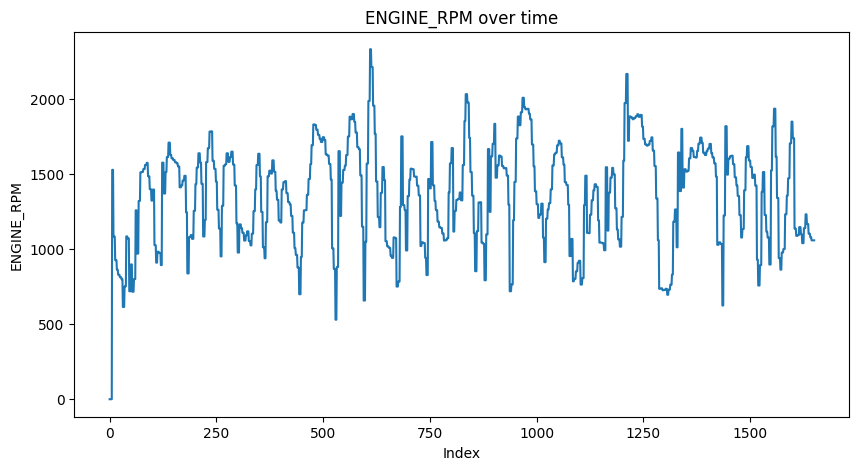

In [46]:
import matplotlib.pyplot as plt

# Replace 'COLUMN_NAME' with the actual column you want to plot
column_name = 'ENGINE_RPM'
plt.figure(figsize=(10, 5))
plt.plot(df[column_name])
plt.xlabel('Index')
plt.ylabel(column_name)
plt.title(f'{df[column_name].name} over time')
plt.show()

In [11]:
df.columns

Index(['ENGINE_RUN_TINE ()', 'ENGINE_RPM ()', 'VEHICLE_SPEED ()',
       'THROTTLE ()', 'ENGINE_LOAD ()', 'COOLANT_TEMPERATURE ()',
       'LONG_TERM_FUEL_TRIM_BANK_1 ()', 'SHORT_TERM_FUEL_TRIM_BANK_1 ()',
       'INTAKE_MANIFOLD_PRESSURE ()', 'FUEL_TANK ()', 'ABSOLUTE_THROTTLE_B ()',
       'PEDAL_D ()', 'PEDAL_E ()', 'COMMANDED_THROTTLE_ACTUATOR ()',
       'FUEL_AIR_COMMANDED_EQUIV_RATIO ()', 'ABSOLUTE_BAROMETRIC_PRESSURE ()',
       'RELATIVE_THROTTLE_POSITION ()', 'INTAKE_AIR_TEMP ()',
       'TIMING_ADVANCE ()', 'CATALYST_TEMPERATURE_BANK1_SENSOR1 ()',
       'CATALYST_TEMPERATURE_BANK1_SENSOR2 ()', 'CONTROL_MODULE_VOLTAGE ()',
       'COMMANDED_EVAPORATIVE_PURGE ()', 'TIME_RUN_WITH_MIL_ON ()',
       'TIME_SINCE_TROUBLE_CODES_CLEARED ()',
       'DISTANCE_TRAVELED_WITH_MIL_ON ()', 'WARM_UPS_SINCE_CODES_CLEARED ()'],
      dtype='object')